<a href="https://colab.research.google.com/github/BrunoTohoru/MiniCurso-MachineLearning/blob/main/MiniCurso_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bem Vindos ao MiniCurso de Machine Learning com TensorFlow!

Abaixo precisaremos de algumas bibliotecas essenciais para a elaboração do nosso projeto.

Então nosso primeiro passo será importar essas bibliotecas para termos a ferramenta preparada com todas as funções que precisamos.

Alguns comando do Colab para facilitar e agilizar o nosso mini curso são:
* Ctrl + m -> m para Converter para célula de texto
* Ctrl + m -> b para Inserir célula de código abaixo
* Ctrl + *enter* para Executar a célula em foco

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import itertools
from tensorflow.keras.utils import plot_model

## Adquirindo nossos dados amostrais

O próprio TensorFlow tem uma biblioteca de imagens para classificação de modelo multiclasse

In [5]:
from tensorflow.keras.datasets import fashion_mnist

(dados_treino, rotulos_treino), (dados_teste, rotulos_teste) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### Visualizando nossos dados

Agora vamos visualizar nossos dados

In [6]:
print(f"Amostra de dados de treino:\n{dados_treino[0]}")
print(f"Amostra de rotulo de treino:\n{rotulos_treino[0]}")

Amostra de dados de treino:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   

### Verificando o as dimenções das amostras e dos rótulos

In [7]:
dados_treino[0].shape, rotulos_treino[0].shape

((28, 28), ())

### Visualizando as amostras de forma mais clara

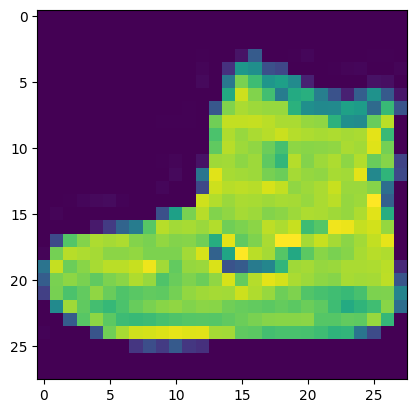

In [8]:
plt.imshow(dados_treino[0])

Vamos melhorar um pouco mais nossa visualização dos dados

In [9]:
nome_rotulos = ["Camiseta", "Calça", "Pulôver", "Vestido", "Casaco", "Sandalha/ Tamanco", "Camisa", "Tênis", "Bolsa", "Coturno"]

len(nome_rotulos)

10

Text(0.5, 1.0, 'Camiseta')

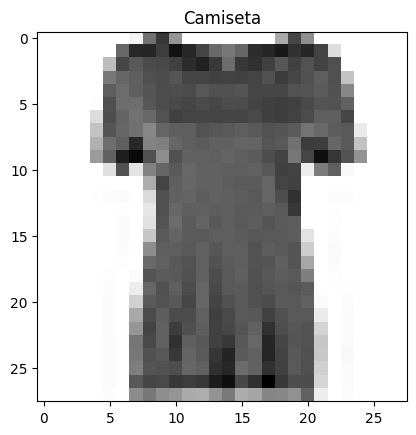

In [10]:
indice_escolhido = 10

plt.imshow(dados_treino[indice_escolhido], cmap=plt.cm.binary)
plt.title(nome_rotulos[rotulos_treino[indice_escolhido]])

Para agilizar o processo de visualização dos dados, faremos de uma forma mais produtiva.

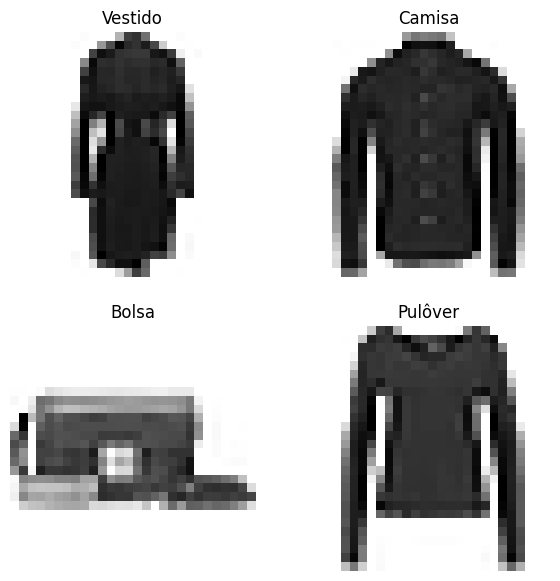

In [11]:
plt.figure(figsize=(7, 7))
for i in range(4):
  x = plt.subplot(2, 2, i+1)
  indice_alea = random.choice(range(len(dados_treino)))
  plt.imshow(dados_treino[indice_alea], cmap=plt.cm.binary)
  plt.title(nome_rotulos[rotulos_treino[indice_alea]])
  plt.axis(False)

## Construindo nosso modelo de classificação multiclasse

Para nosso modelo de classificação multiclasse, vamos modificar algumas coisas:
* Input shape = 28 x 28 (o formato da imagem)
* Output shape = 10 (a quantidade de classes/ rotulos)
* Loss function = tf.keras.losses.CategoriaCrossentropy()
* Output layer activation = Softmax (não sigmoid)


In [12]:
tf.random.set_seed(42)

modelo_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

modelo_1.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

historico = modelo_1.fit(
    dados_treino,
    rotulos_treino,
    epochs=10,
    validation_data=(dados_teste, rotulos_teste)
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4081 - accuracy: 0.0987 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2993 - accuracy: 0.1005 - val_loss: 2.2009 - val_accuracy: 0.1310
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.8263 - accuracy: 0.2333 - val_loss: 1.7118 - val_accuracy: 0.2735
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6810 - accuracy: 0.2697 - val_loss: 1.6498 - val_accuracy: 0.2810
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6406 - accuracy: 0.2789 - val_loss: 1.6330 - val_accuracy: 0.2810
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6216 - accuracy: 0.2836 - val_loss: 1.6096 - val_accuracy: 0.2921
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6135 - accuracy: 0.2839 - val_loss: 1.6223 - val_accuracy:

In [13]:
modelo_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Vamos verificar os valores mínimos e máximos dos dados de treino

In [14]:
dados_treino.min(), dados_treino.max()

(0, 255)

Nosso modelo trabalha melhor com dados normalizados, então o que podemos fazer para ajustar esses dados?

In [15]:
# ótimo, agora que sabemos. Mãos a obra!
dados_treino_norm = dados_treino / 255.0
dados_teste_norm = dados_teste / 255.0

dados_treino_norm.min(), dados_treino_norm.max()

(0.0, 1.0)

Vamos utilizar agora o mesmo model que o anterior, porém com os dados normalizados.

In [16]:
tf.random.set_seed(42)

modelo_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

modelo_2.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

historico_norm = modelo_2.fit(
    dados_treino_norm,
    rotulos_treino,
    epochs=10,
    validation_data=(dados_teste_norm, rotulos_teste)
)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5023 - accuracy: 0.4484 - val_loss: 1.2211 - val_accuracy: 0.5461
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.1255 - accuracy: 0.6042 - val_loss: 1.0627 - val_accuracy: 0.6578
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9938 - accuracy: 0.6637 - val_loss: 0.9736 - val_accuracy: 0.6605
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9286 - accuracy: 0.6739 - val_loss: 0.9348 - val_accuracy: 0.6727
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8920 - accuracy: 0.6866 - val_loss: 0.9117 - val_accuracy: 0.6812
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8654 - accuracy: 0.6938 - val_loss: 0.9014 - val_accuracy: 0.7062
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8428 - accuracy: 0.7103 - val_loss: 0.8684 - val_accuracy:

## Analizando os resultados

Vamos utilizar gráficos de linha para ajudar a visualizar como nossos modelos se comportaram.

<Axes: title={'center': 'Dados normalizados'}>

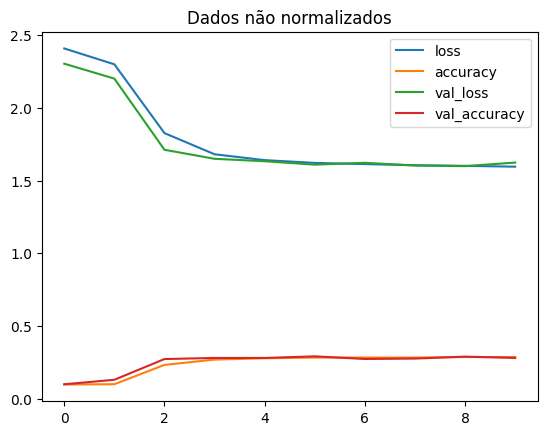

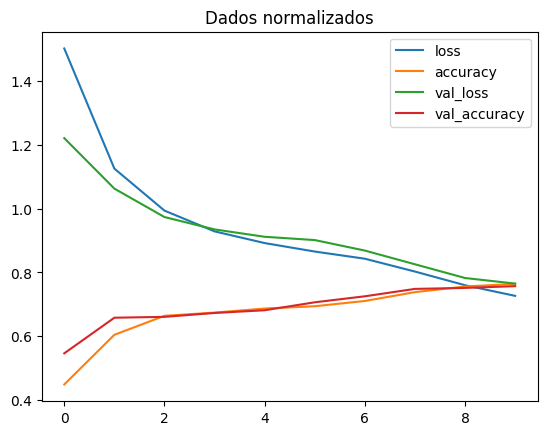

In [17]:
pd.DataFrame(historico.history).plot(title="Dados não normalizados")
pd.DataFrame(historico_norm.history).plot(title="Dados normalizados")

**Nota:** Compare os resultados dos modelos apenas com a normalização dos dados.

## Achando o LR (Learning Rate) ideal

In [18]:
tf.random.set_seed(42)

modelo_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

modelo_3.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

lr_ideal = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 **(epoch/20))

historico_lr = modelo_3.fit(
    dados_treino_norm,
    rotulos_treino,
    epochs=40,
    validation_data=(dados_teste_norm, rotulos_teste),
    callbacks=[lr_ideal]
)

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1550 - accuracy: 0.5660 - val_loss: 0.7599 - val_accuracy: 0.7212 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6735 - accuracy: 0.7603 - val_loss: 0.6513 - val_accuracy: 0.7715 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6036 - accuracy: 0.7880 - val_loss: 0.6248 - val_accuracy: 0.7805 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5753 - accuracy: 0.7995 - val_loss: 0.5948 - val_accuracy: 0.7949 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5600 - accuracy: 0.8063 - val_loss: 0.6159 - val_accuracy: 0.7868 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5485 - accuracy: 0.8096 - val_loss: 0.5912 - val_accuracy: 0.7938 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Encontrando o LR ideal')

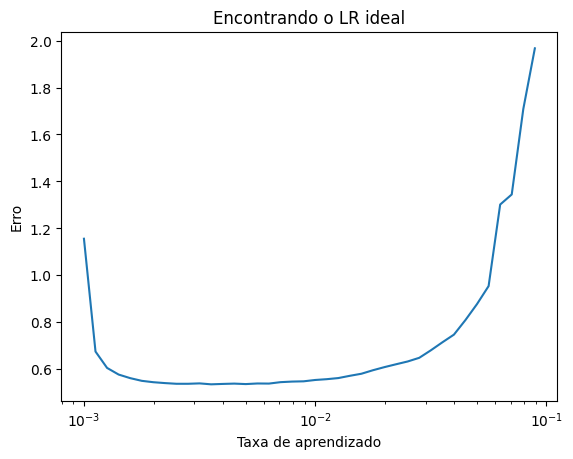

In [19]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, historico_lr.history["loss"])
plt.xlabel("Taxa de aprendizado")
plt.ylabel("Erro")
plt.title("Encontrando o LR ideal")

De acordo com o gráfico, o lr ideal seria 0,002

In [20]:
tf.random.set_seed(42)

modelo_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

modelo_4.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=["accuracy"]
)

historico_4 = modelo_4.fit(
    dados_treino_norm,
    rotulos_treino,
    epochs=20,
    validation_data=(dados_teste_norm, rotulos_teste)
)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9803 - accuracy: 0.6650 - val_loss: 0.7125 - val_accuracy: 0.7574
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6608 - accuracy: 0.7704 - val_loss: 0.6477 - val_accuracy: 0.7763
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6196 - accuracy: 0.7842 - val_loss: 0.6358 - val_accuracy: 0.7808
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6030 - accuracy: 0.7894 - val_loss: 0.6349 - val_accuracy: 0.7839
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5939 - accuracy: 0.7931 - val_loss: 0.6402 - val_accuracy: 0.7826
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5883 - accuracy: 0.7949 - val_loss: 0.6239 - val_accuracy: 0.7833
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5839 - accuracy: 0.7948 - val_loss: 0.6406 - val_accuracy:

## Avaliando nosso modelo de classificação multiclasse com Matriz de Confusão

In [21]:
from sklearn.metrics import confusion_matrix

y_probs = modelo_4.predict(dados_teste_norm)
y_preds = y_probs.argmax(axis=1)

confusion_matrix(
    y_true=rotulos_teste,
    y_pred=y_preds
)

313/313 [==============================] - 0s 1ms/step


array([[748,   5,  16,  86,   5,   3, 125,   1,  11,   0],
       [  5, 935,   8,  39,   6,   0,   6,   0,   1,   0],
       [ 23,   4, 611,  11, 183,   0, 166,   0,   2,   0],
       [ 51,  12,   7, 827,  26,   3,  65,   0,   6,   3],
       [  1,   2,  76,  33, 768,   0, 113,   0,   7,   0],
       [  4,   0,   0,   3,   0, 835,   3,  80,  25,  50],
       [142,   4,  99,  58, 165,   9, 507,   0,  16,   0],
       [  0,   0,   0,   0,   0,  53,   0, 885,   7,  55],
       [  3,   0,   4,  11,  12,   5,  80,   8, 876,   1],
       [  0,   0,   0,   4,   0,  21,   0,  32,   2, 941]])

Uma Matriz mais bonita!

In [24]:
def plot_matriz_conf(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)

  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(
      title="Matriz de Confusão",
      xlabel="Routlos de Predição",
      ylabel="Rotulos verdade",
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels
  )

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

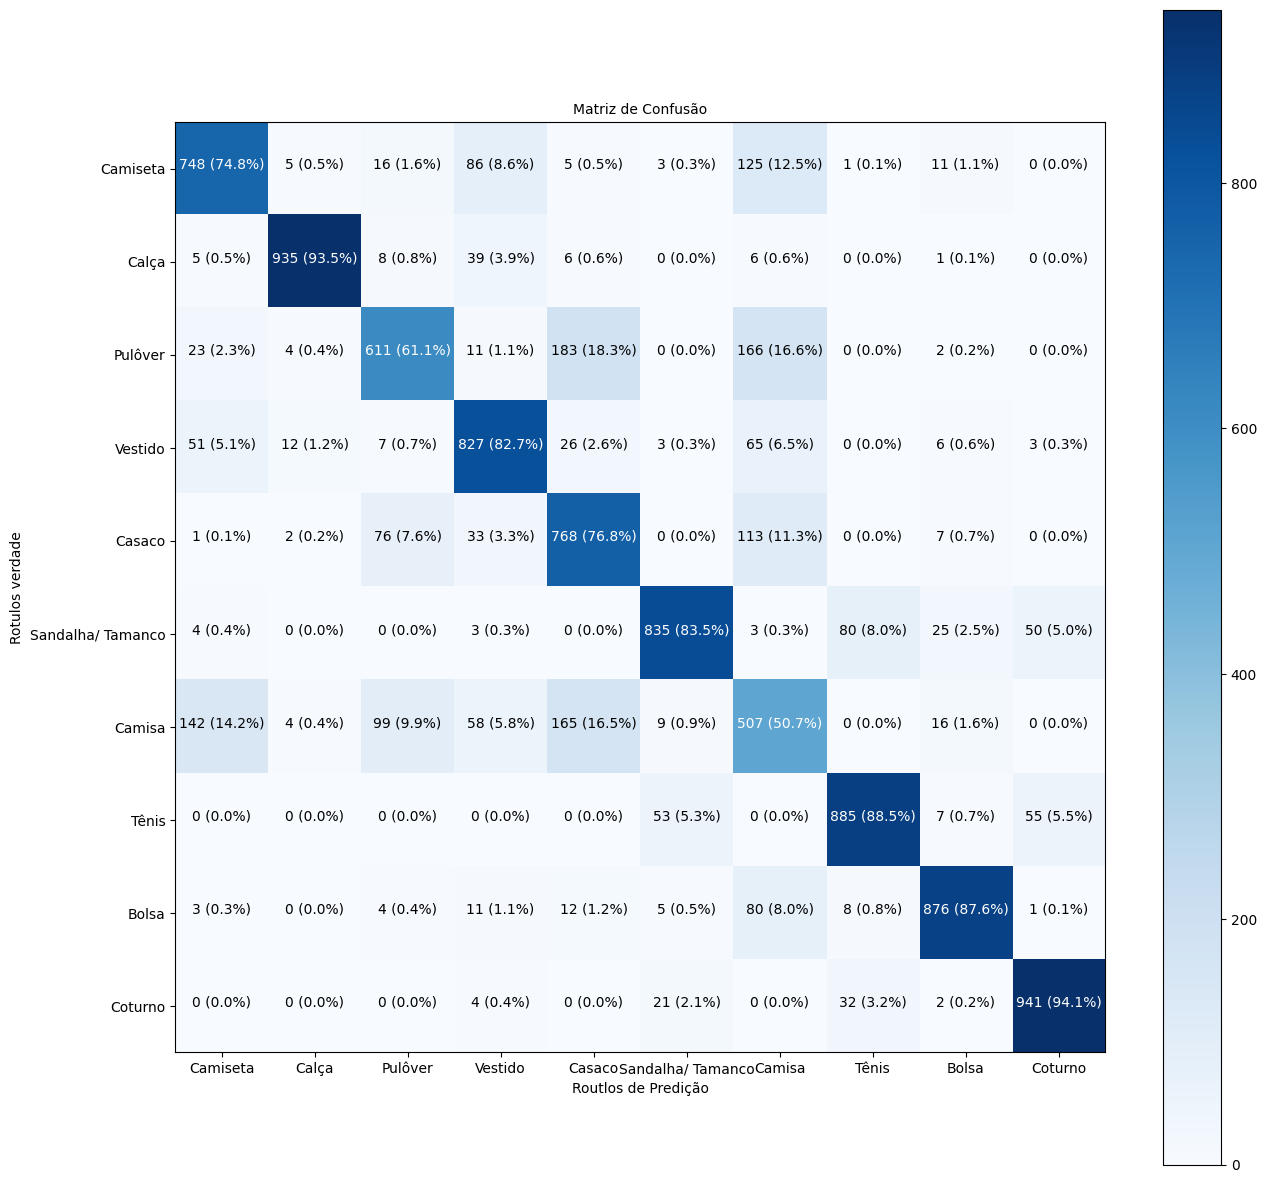

In [25]:
plot_matriz_conf(
    y_true=rotulos_teste,
    y_pred=y_preds,
    classes=nome_rotulos,
    figsize=(15,15),
    text_size=10
)

## Como Salvar e Carregar nosso modelo treinado?

Para salvar, podemos escolher entre dois formatos principais:

1. O formato SavedModel
2. O formato HDF5 (Hierarchical Data Format)

In [26]:
# 1.
modelo_4.save("Minicurso_ML")

In [27]:
# 2.
modelo_4.save("Minicurso_ML2.h5")

#Mais indicado para arquivos mais pesados

Vamos carregar nosso modelo novamente!

In [28]:
# Para carregar os modelos salvos, usaremos o mesmo método para ambos formatos

Modelo_Carregado1 = tf.keras.models.load_model("/content/Minicurso_ML")
Modelo_Carregado1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________
